<a href="https://colab.research.google.com/github/kid-116/ISTE-ML-SGP-21/blob/main/Week3/ML_ISTE_Clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Importing Libraries</b></h1>

In [1]:
pip install category_encoders

     |████████████████████████████████| 81kB 2.6MB/s 


In [2]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import missingno as msno
import category_encoders as ce
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




<h1><b>Data Loading</b></h1>

In [3]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [15]:
orig_df = df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h1><b>Taking Care of Missing/Unimportant Data</b></h1>

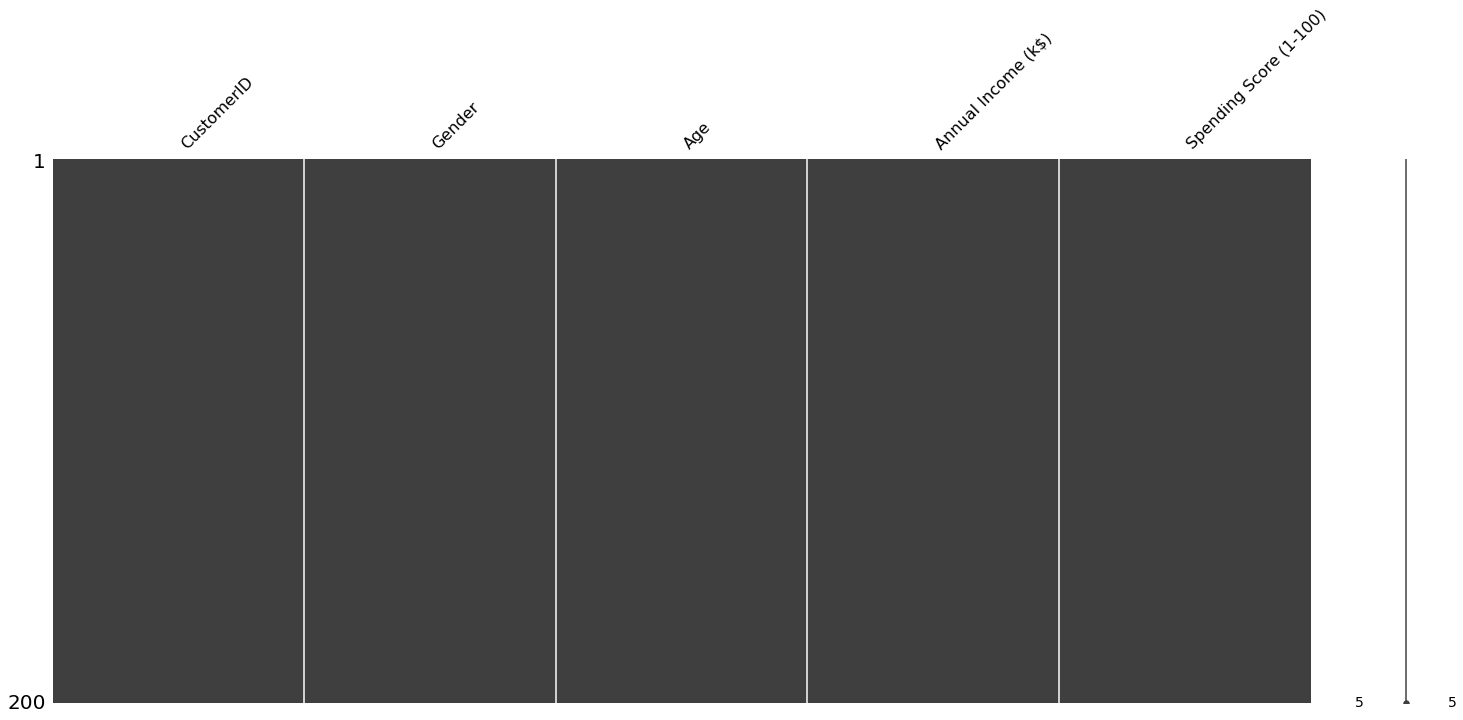

In [7]:
msno.matrix(df)

The dataset is complete.
CustomerID is a useless column.

In [17]:
df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<h1><b>Encoding</b></h1>

**Nominal Encoding** for **Gender**

In [18]:
en = ce.OrdinalEncoder(
    cols = ['Gender'],
    return_df = True,
    mapping = [
               {
                   'col': 'Gender',
                   'mapping': {
                       'Male': 0,
                       'Female': 1
                   }
               }
    ]
)
df = en.fit_transform(df)
df.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


<h1><b>Visualizing the Data-Frame</b></h1>

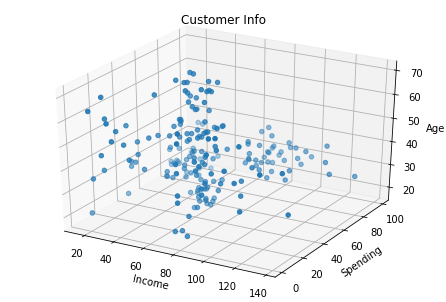

In [10]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
z = df['Age']
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.set_title('Customer Info')
ax.set_xlabel('Income')
ax.set_ylabel('Spending')
ax.set_zlabel('Age')
plt.show()

Can't really understand much.

<h1><b>Feature Scaling</b></h1>

**MinMaxScaling** for **Age, Income, Spending Score**

In [19]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in cols:
  min = df[col].min()
  max = df[col].max()
  df[col] = (df[col] - min) / (max - min)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.019231,0.000000,0.387755
1,0,0.057692,0.000000,0.816327
2,1,0.038462,0.008197,0.051020
3,1,0.096154,0.008197,0.775510
4,1,0.250000,0.016393,0.397959


<h1><b>K-Means Clustering

Let us drop the 'Gender' column as well to get a 3D plot.

In [20]:
df = df.drop(['Gender'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [22]:
k = 5
model = KMeans(n_clusters = k)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
labels = model.predict(df)
centroids = model.cluster_centers_

[0 1 2 3 4]


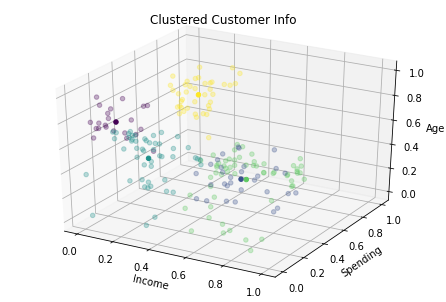

In [58]:
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']
x = df['Age']
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=labels.astype(float), alpha=0.3)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c=np.arange(5).astype(float), alpha=1)
ax.set_title('Clustered Customer Info')
ax.set_xlabel('Income')
ax.set_ylabel('Spending')
ax.set_zlabel('Age')
plt.show()